In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

C:\Users\e0444187\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
filepath = 'C:\\Users\\e0444187\\Downloads\\dataset_with_merged_loc.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,Unnamed: 0,hadm_id,maximum_Glucose,maximum_Lactate,maximum_Sodium,maximum_Temperature,minimum_Glucose,minimum_Lactate,minimum_Sodium,minimum_Temperature,...,Radial,Side Head,Subclavian,Upper Arm,nan_x,ICP Line,Invasive Arterial,Invasive Venous,nan_y,clabsi
0,0,20000094,383.0,6.9,127.0,36.8,383.0,4.5,127.0,36.8,...,0,0,0,0,0,0,0,1,0,0
1,1,20000147,160.0,1.9,134.0,NaN,100.0,1.0,134.0,NaN,...,1,0,0,0,1,0,1,0,1,0
2,2,20000808,109.0,NaN,138.0,NaN,109.0,NaN,138.0,NaN,...,1,0,0,0,1,0,1,0,1,0
3,3,20001305,96.0,2.0,140.0,NaN,96.0,2.0,140.0,NaN,...,0,0,0,0,1,0,0,0,1,0
4,4,20001494,147.0,NaN,139.0,NaN,147.0,NaN,139.0,NaN,...,1,0,0,0,0,0,1,0,0,0


In [4]:
# Checking which columns have NaNs
print(df.columns[df.isna().any()].tolist())

['maximum_Glucose', 'maximum_Lactate', 'maximum_Sodium', 'maximum_Temperature', 'minimum_Glucose', 'minimum_Lactate', 'minimum_Sodium', 'minimum_Temperature']


In [5]:
for col in df.columns[df.isna().any()].tolist():
    print(df[col].unique())

[ 383.  160.  109.   96.  147.  175.  190.  135.   nan  130.  115.  177.
  162.  153.  166.  161.  155.   84.  158.  149.  168.  170.  142.  120.
  184.  342.  108.  118.  163.   95.  178.  129.  229.  151.   99.  140.
  189.   97.  224.  148.  202.   89.  134.  186.  165.  119.  141.  215.
   98.  336.  227.  133.  132.  390.   85.  154.  127.  124.  116.  152.
  114.   62.  156.  104.  220.  139.  110.  125.  193.  425.  181.  206.
  122.   87.  216.  123.  228.  105.  176.  183.  486.  100.  164.  185.
  131.   76.  113.   83.  395.  107.  144.   73.  143.  173.  347.  111.
  300.  157.  150.  212.  312.   93.  207.  196.  172.  117.  188.   72.
  238.  159.  167.  199.  174.  145.  187.  182.  121.   37.   70.  233.
  253.  128.  179.  112.  296.  239.  200.  246.  146.   94.  340.  245.
   91.  263.  137.  210.  180.  203.  250.  270.  234.  101.  103.  272.
  230.  232.  211.  126.  136.  204.  169.  209.  208.  251.   69.  192.
  231.  276.  288.  235.  283.   92.  280.  299.  1

In [6]:
values = {"maximum_Glucose": 110, "maximum_Intubated": 'No', "maximum_Lactate": 1, "maximum_Sodium": 140, "maximum_Temperature": 37, "minimum_Glucose": 110, "minimum_Intubated": 'No', "minimum_Lactate": 1, "minimum_Sodium": 140, "minimum_Temperature": 37}
df = df.fillna(value=values)

#df = df.drop(['maximum_Intubated', 'minimum_Intubated'], axis=1)
print(df.shape)

(39338, 45)


In [7]:
# Checking which columns have NaNs
print(df.columns[df.isna().any()].tolist())

[]


In [8]:
# To check if there is any feature with only one unique value
for col in df:
    print(len(df[col].unique()))

39338
39338
599
238
73
93
411
204
70
105
32555
2
2
2
2
2
2
2
2
2
2
2
2
2
2
73
1487
6
4
7
4
11
3
6
12
9
2
8
5
14
6
10
18
14
2


In [9]:
# Printing feature names
print(df.columns)

Index(['Unnamed: 0', 'hadm_id', 'maximum_Glucose', 'maximum_Lactate',
       'maximum_Sodium', 'maximum_Temperature', 'minimum_Glucose',
       'minimum_Lactate', 'minimum_Sodium', 'minimum_Temperature',
       'subject_id', 'peripheral_vascular_disease', 'cerebrovascular_disease',
       'dementia', 'chronic_pulmonary_disease', 'rheumatic_disease',
       'mild_liver_disease', 'diabetes_without_cc', 'diabetes_with_cc',
       'renal_disease', 'malignant_cancer', 'severe_liver_disease',
       'metastatic_solid_tumor', 'aids', 'gender', 'age', 'patientweight',
       'Antecube', 'Axilla', 'Brachial', 'Central', 'Femoral', 'Foot',
       'ICP monitors', 'IJ', 'Radial', 'Side Head', 'Subclavian', 'Upper Arm',
       'nan_x', 'ICP Line', 'Invasive Arterial', 'Invasive Venous', 'nan_y',
       'clabsi'],
      dtype='object')


In [10]:
# Moving subject_id to first column
first_column = df.pop('subject_id')
df.insert(0, 'subject_id', first_column)
df.head()

to_be_dropped_later = ['subject_id', 'Unnamed: 0', 'hadm_id']

In [11]:
# Separate class 0 and class 1
df_c0 = df.loc[df['clabsi'] == 0]
df_c1 = df.loc[df['clabsi'] == 1]

print(df_c0.shape)
print(df_c1.shape)

(38980, 45)
(358, 45)


In [12]:
print(df_c0['clabsi'].unique())
print(df_c1['clabsi'].unique())

[0]
[1]


In [13]:
# Splitting 80% of data
df_train_0 = df_c0[:math.ceil(0.8*len(df_c0))]
df_val_0 = df_c0[math.ceil(0.8*len(df_c0)):]

print(df_train_0.shape)
print(df_val_0.shape)


df_train_1 = df_c1[:math.ceil(0.8*len(df_c1))]
df_val_1 = df_c1[math.ceil(0.8*len(df_c1)):]

print(df_train_1.shape)
print(df_val_1.shape)

(31184, 45)
(7796, 45)
(287, 45)
(71, 45)


In [14]:
# Checking if any subject ids are in both training and validation set
df_train_0.tail()
df_val_0.head()

,subject_id,Unnamed: 0,hadm_id,maximum_Glucose,maximum_Lactate,maximum_Sodium,maximum_Temperature,minimum_Glucose,minimum_Lactate,minimum_Sodium,...,Radial,Side Head,Subclavian,Upper Arm,nan_x,ICP Line,Invasive Arterial,Invasive Venous,nan_y,clabsi
31467,11742095,31467,27987248,110.0,1.0,140.0,37.0,110.0,1.0,140.0,...,0,0,1,0,0,0,0,1,0,0
31468,16407546,31468,27988115,110.0,5.8,130.0,37.0,110.0,3.7,130.0,...,0,0,0,0,7,0,1,1,7,0
31469,10756817,31469,27988243,241.0,1.0,136.0,37.0,149.0,1.0,135.0,...,1,0,0,0,0,0,1,1,0,0
31470,14277365,31470,27988400,90.0,3.8,142.0,37.3,60.0,2.7,141.0,...,0,0,0,0,2,0,1,1,2,0
31471,15051936,31471,27988628,110.0,1.0,137.0,37.0,110.0,1.0,134.0,...,0,0,0,0,1,0,0,0,1,0


In [15]:
# Checking if any subject ids are in both training and validation set
df_train_1.tail()
df_val_1.head()

,subject_id,Unnamed: 0,hadm_id,maximum_Glucose,maximum_Lactate,maximum_Sodium,maximum_Temperature,minimum_Glucose,minimum_Lactate,minimum_Sodium,...,Radial,Side Head,Subclavian,Upper Arm,nan_x,ICP Line,Invasive Arterial,Invasive Venous,nan_y,clabsi
32183,12231709,32183,28173284,178.0,3.4,143.0,38.8,73.0,1.3,143.0,...,2,0,0,0,8,0,4,5,8,1
32186,18376139,32186,28174033,141.0,1.0,140.0,38.7,70.0,1.0,140.0,...,2,0,0,0,3,0,2,2,3,1
32256,17041034,32256,28189368,110.0,1.4,136.0,37.0,110.0,1.4,136.0,...,0,0,0,0,2,0,0,0,2,1
32477,14236258,32477,28249155,86.0,1.0,137.0,37.0,86.0,1.0,137.0,...,0,0,0,0,1,0,0,0,1,1
32496,12641980,32496,28255255,100.0,1.4,134.0,36.4,94.0,1.1,132.0,...,0,0,0,0,3,0,0,0,3,1


In [16]:
# Using random undersampling (1:1 ratio)

df_train_0_rus = df_train_0[:len(df_train_1)]
print(df_train_0_rus.shape)

(287, 45)


In [17]:
# Merging the two classes in training and validation sets

df_train_rus = pd.concat([df_train_0_rus, df_train_1])
print(df_train_rus.shape)

df_val_rus = pd.concat([df_val_0, df_val_1])
print(df_val_rus.shape)

(574, 45)
(7867, 45)


In [18]:
# Shuffling the rows

df_train = df_train_rus.sample(frac=1, random_state=0).reset_index(drop=True)
df_val = df_val_rus.sample(frac=1, random_state=0).reset_index(drop=True)

In [19]:
# Deleting unnecessary columns

df_train = df_train.drop(to_be_dropped_later, axis=1)
print(df_train.shape)

df_val = df_val.drop(to_be_dropped_later, axis=1)
print(df_val.shape)

(574, 42)
(7867, 42)


In [20]:
# Extracting labels

y_train = df_train['clabsi']
df_train = df_train.drop(['clabsi'], axis=1)
print(y_train.shape)
print(df_train.shape)

y_val = df_val['clabsi']
df_val = df_val.drop(['clabsi'], axis=1)
print(y_val.shape)
print(df_val.shape)

(574,)
(574, 41)
(7867,)
(7867, 41)


In [21]:
# Printing feature names
print(df_train.columns)

for col in df_train:
    print(len(df_train[col].unique()))

Index(['maximum_Glucose', 'maximum_Lactate', 'maximum_Sodium',
       'maximum_Temperature', 'minimum_Glucose', 'minimum_Lactate',
       'minimum_Sodium', 'minimum_Temperature', 'peripheral_vascular_disease',
       'cerebrovascular_disease', 'dementia', 'chronic_pulmonary_disease',
       'rheumatic_disease', 'mild_liver_disease', 'diabetes_without_cc',
       'diabetes_with_cc', 'renal_disease', 'malignant_cancer',
       'severe_liver_disease', 'metastatic_solid_tumor', 'aids', 'gender',
       'age', 'patientweight', 'Antecube', 'Axilla', 'Brachial', 'Central',
       'Femoral', 'Foot', 'ICP monitors', 'IJ', 'Radial', 'Side Head',
       'Subclavian', 'Upper Arm', 'nan_x', 'ICP Line', 'Invasive Arterial',
       'Invasive Venous', 'nan_y'],
      dtype='object')
191
76
32
52
138
47
31
47
2
2
2
2
2
2
2
2
2
2
2
2
2
2
73
342
4
3
3
1
7
1
2
9
6
1
7
4
9
2
7
12
9


In [22]:
# Normalizing only certain columns

cols_to_norm = ['maximum_Glucose','maximum_Lactate','maximum_Sodium','maximum_Temperature','minimum_Glucose','minimum_Lactate','minimum_Sodium','minimum_Temperature','age','patientweight', 'Antecube', 'Axilla', 'Brachial', 'Central', 'Femoral', 'Foot', 'IJ', 'Radial', 'Side Head', 'Subclavian', 'Upper Arm', 'nan_x', 'ICP Line','Invasive Arterial', 'Invasive Venous', 'nan_y']

scaler = StandardScaler()

df_train[cols_to_norm] = scaler.fit_transform(df_train[cols_to_norm])
df_val[cols_to_norm] = scaler.transform(df_val[cols_to_norm])

In [23]:
# Converting gender into one-hot encoding

one_hot = pd.get_dummies(df_train['gender'], drop_first=True)
df_train = df_train.drop('gender', axis = 1)
df_train = df_train.join(one_hot)

one_hot = pd.get_dummies(df_val['gender'], drop_first=True)
df_val = df_val.drop('gender', axis = 1)
df_val = df_val.join(one_hot)

print(df_train.shape)
print(df_val.shape)

(574, 41)
(7867, 41)


In [24]:
for col in df_train:
    print(type(df_train[col][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.uint8'>


In [25]:
#Split dataset (or directly store the split dataset in the right variables)

X_train = df_train
X_test = df_val
y_train = np.array(y_train)
y_test = np.array(y_val)

In [26]:
# Logistic Regression

#Create an instance of the model
clf = LogisticRegression(random_state=0)

#Fit the Model to the Data
clf.fit(X_train, y_train)

# Evaluation metrics

# Predicts labels for test data
y_pred = clf.predict(X_test)

#Predicts probability, useful also in log loss calculations (and ROC AUC).
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC: %f' % auc)

[[5662 2134]
 [  17   54]]
Accuracy: 0.726579
Precision: 0.024680
Recall: 0.760563
F1 score: 0.047809
ROC AUC: 0.797681


In [27]:
# Decision Tree

#Create an instance of the model
clf = DecisionTreeClassifier(random_state=0)

#Fit the Model to the Data
clf.fit(X_train, y_train)

# Evaluation metrics

# Predicts labels for test data
y_pred = clf.predict(X_test)

#Predicts probability, useful also in log loss calculations (and ROC AUC).
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC: %f' % auc)

[[5059 2737]
 [  35   36]]
Accuracy: 0.647642
Precision: 0.012982
Recall: 0.507042
F1 score: 0.025316
ROC AUC: 0.577982


In [28]:
# Random Forest

#Create an instance of the model
clf = RandomForestClassifier(max_depth=2, random_state=0)

#Fit the Model to the Data
clf.fit(X_train, y_train)

# Evaluation metrics

# Predicts labels for test data
y_pred = clf.predict(X_test)

#Predicts probability, useful also in log loss calculations (and ROC AUC).
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC: %f' % auc)

[[5606 2190]
 [  22   49]]
Accuracy: 0.718825
Precision: 0.021885
Recall: 0.690141
F1 score: 0.042424
ROC AUC: 0.768269


[[5591 2205]
 [  17   54]]
Accuracy: 0.717554
Precision: 0.023904
Recall: 0.760563
F1 score: 0.046352
ROC AUC: 0.796286


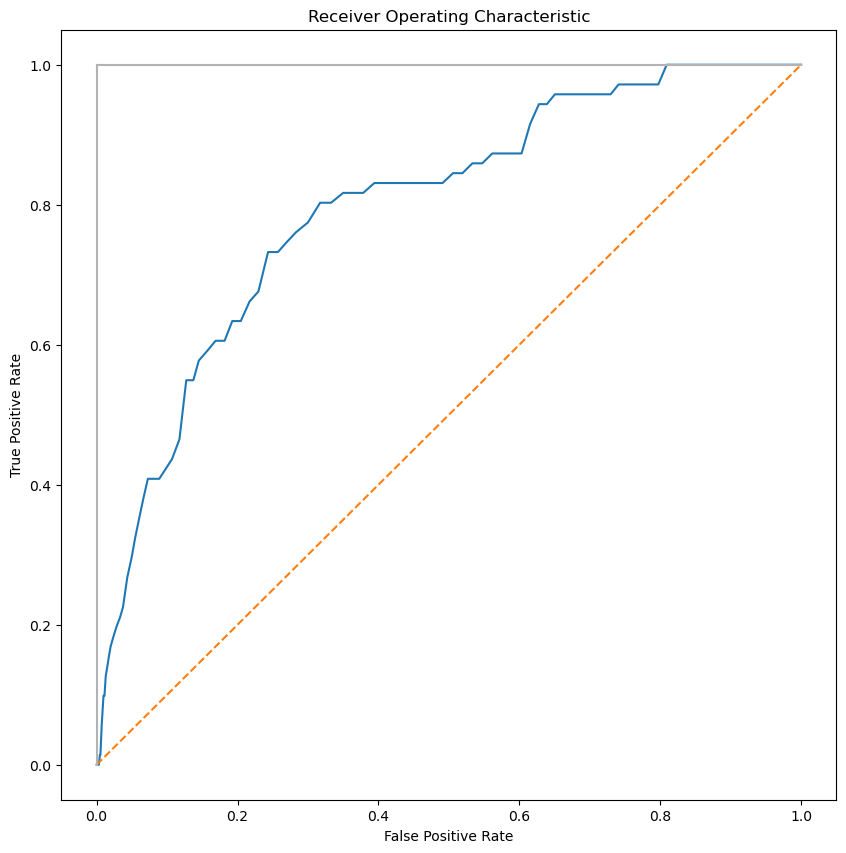

In [29]:
# Extra Trees Classifier

#Create an instance of the model
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

#Fit the Model to the Data
clf.fit(X_train, y_train)

# Evaluation metrics

# Predicts labels for test data
y_pred = clf.predict(X_test)

#Predicts probability, useful also in log loss calculations (and ROC AUC).
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC: %f' % auc)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_prob)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#plt.savefig('roc_curve.pdf')

In [30]:
# Gradient Boosting

#Create an instance of the model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

#Fit the Model to the Data
clf.fit(X_train, y_train)

# Evaluation metrics

# Predicts labels for test data
y_pred = clf.predict(X_test)

#Predicts probability, useful also in log loss calculations (and ROC AUC).
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC: %f' % auc)

[[5311 2485]
 [  25   46]]
Accuracy: 0.680946
Precision: 0.018175
Recall: 0.647887
F1 score: 0.035357
ROC AUC: 0.740338


In [31]:
# AdaBoost

#Create an instance of the model
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

#Fit the Model to the Data
clf.fit(X_train, y_train)

# Evaluation metrics

# Predicts labels for test data
y_pred = clf.predict(X_test)

#Predicts probability, useful also in log loss calculations (and ROC AUC).
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC: %f' % auc)

[[5267 2529]
 [  23   48]]
Accuracy: 0.675607
Precision: 0.018626
Recall: 0.676056
F1 score: 0.036254
ROC AUC: 0.741549


In [32]:
# XGBoost

#Create an instance of the model
clf = XGBClassifier(random_state=0, use_label_encoder=False)

#Fit the Model to the Data
clf.fit(X_train, y_train)

# Evaluation metrics

# Predicts labels for test data
y_pred = clf.predict(X_test)

#Predicts probability, useful also in log loss calculations (and ROC AUC).
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC: %f' % auc)

[15:01:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[5331 2465]
 [  19   52]]
Accuracy: 0.684251
Precision: 0.020660
Recall: 0.732394
F1 score: 0.040185
ROC AUC: 0.782218


C:\Users\e0444187\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
